In [1]:
import os

import pandas as pd
from dotenv import load_dotenv
from sqlalchemy import create_engine
import altair as alt

In [2]:
alt.renderers.enable("mimetype");

In [3]:
load_dotenv()

connection_string = "postgresql://{user}:{password}@{host}:{port}/{db}".format(
    user=os.getenv('DB_USER'),
    password=os.getenv('DB_PASSWORD'),
    host=os.getenv('DB_HOST'),
    port=os.getenv('DB_PORT'),
    db=os.getenv('DB_NAME')
)
engine = create_engine(connection_string)

### Gliders

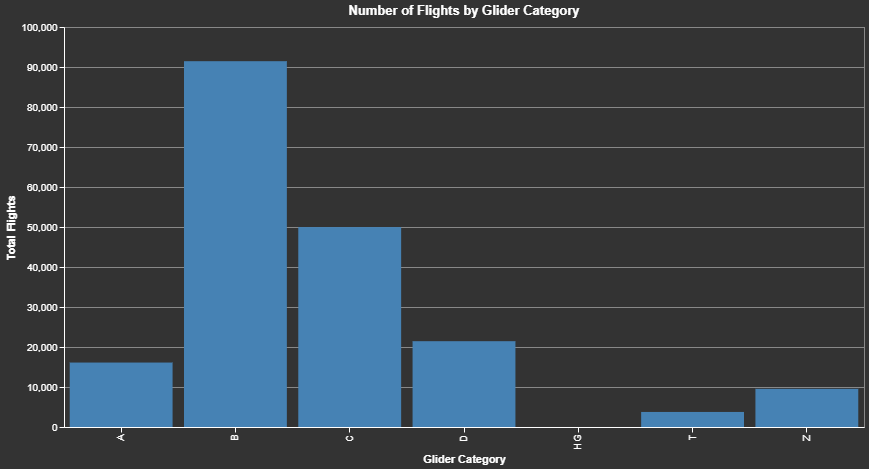

In [4]:
query = """
SELECT
    glider_cat,
    COUNT(*) AS total_flights
FROM source.flights
GROUP BY glider_cat
"""
df = pd.read_sql(query, engine)
barchart = alt.Chart(df).mark_bar(color='steelblue').encode(
    x=alt.X('glider_cat:N', sort=alt.EncodingSortField(field='glider_cat'), title='Glider Category'),
    y=alt.Y('total_flights:Q', title='Total Flights'),
    tooltip=['glider_cat:N', 'total_flights:Q']
).properties(
    width=800,
    height=400,
    title='Number of Flights by Glider Category'
)
barchart.show()

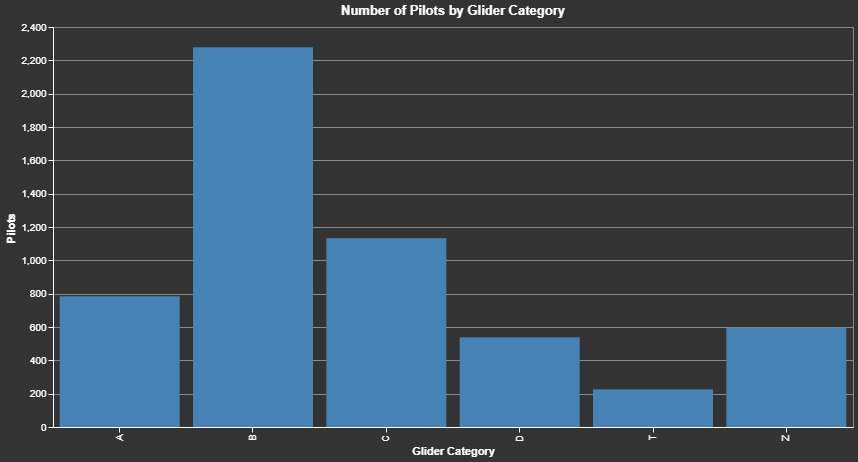

In [5]:
query = """
SELECT
    glider_cat,
    COUNT(DISTINCT pilot) AS num_pilots
FROM source.flights
WHERE glider_cat != 'HG'
GROUP BY glider_cat
"""
df = pd.read_sql(query, engine)
barchart = alt.Chart(df).mark_bar(color='steelblue').encode(
    x=alt.X('glider_cat:N', sort=alt.EncodingSortField(field='glider_cat'), title='Glider Category'),
    y=alt.Y('num_pilots:Q', title='Pilots'),
    tooltip=['glider_cat:N', 'num_pilots:Q']
).properties(
    width=800,
    height=400,
    title='Number of Pilots by Glider Category'
)
barchart.show()

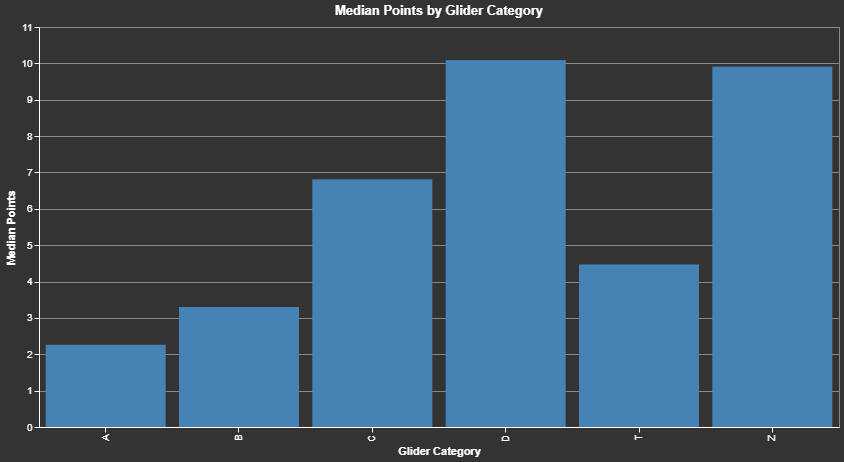

In [6]:
query = """
SELECT
    glider_cat,
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY points) AS median_points
FROM source.flights
WHERE glider_cat != 'HG'
GROUP BY glider_cat
"""
df = pd.read_sql(query, engine)
barchart = alt.Chart(df).mark_bar(color='steelblue').encode(
    x=alt.X('glider_cat:N', sort=alt.EncodingSortField(field='glider_cat'), title='Glider Category'),
    y=alt.Y('median_points:Q', title='Median Points'),
    tooltip=['glider_cat:N', 'median_points:Q']
).properties(
    width=800,
    height=400,
    title='Median Points by Glider Category'
)
barchart.show()

In [7]:
query = """
SELECT
    glider,
    COUNT(DISTINCT pilot) AS num_pilots
FROM source.flights
WHERE date >= '2020-01-01'
GROUP BY glider
ORDER BY COUNT(DISTINCT pilot) DESC
LIMIT 25
"""
df = pd.read_sql(query, engine)
df.head(25)

,glider,num_pilots
0,AXIS Venus SC,122
1,AXIS Comet 3,94
2,GRADIENT Golden 4,70
3,DRIFT Hawk,66
4,GRADIENT Bright 5,57
5,AXIS Pluto 4,56
6,GRADIENT Nevada 2,54
7,ADVANCE Sigma 10,53
8,UP Summit XC4,51
9,MAC PARA Eden 7,49
